# Data compression algorithms
### In this lab we will reasearch and experiment with 3 classical data compression algorithms: Huffman, LZ77 and LZW.

## Huffman

Huffman algorithm uses tree building to create a binary code representations of each symbol using its frequency rate.

In [14]:
import time
from collections import Counter

In [15]:
class Node:
    """
    Tree node class.
    """

    def __init__(self, prob: int, char: str, left = None, right= None) -> None:
        """
        Tree node init method.
        """

        self.prob = prob
        self.char = char
        self.left = left
        self.right = right
        self.code = ''

class Huffman:
    """
    Huffman class.
    """

    def __init__(self, message: str) -> None:
        """
        Object init method.
        """

        self.message = message

    def get_output(self, data, code: dict):
        """
        get encoded output
        """

        output = []

        for i in data:
            output.append(code[i])

        return ''.join([str(j) for j in output])

    def huffman_enc(self):
        """
        main function containing encoding logic.
        """

        char_prob = dict(Counter(self.message))
        chars = char_prob.keys()
        # probs = char_prob.values()

        nodes = []

        for char in chars:
            nodes.append(Node(char_prob.get(char), char))

        while len(nodes) > 1:
            # sort by probs in ascending order
            nodes = sorted(nodes, key=lambda x: x.prob)

            # 2 nodes with smallest prob to start tree
            right = nodes[0]
            left = nodes[1]

            left.code = '0'
            right.code = '1'

            # build new node based first 2
            new_node = Node(left.prob + right.prob, left.char + right.char, left, right)

            nodes.remove(left)
            nodes.remove(right)
            nodes.append(new_node)

            codes_chars = dict()

        def chars_to_codes(node: Node, val=""):
            """
            returns codes for each char in a tree.
            """

            new_val = val + node.code

            # travers through left and right sons recursively
            if node.left:
                chars_to_codes(node.left, new_val)
            if node.right:
                chars_to_codes(node.right, new_val)

            # if reached a leaf, put an entry char: code into a dict codee_chars
            if not node.left and not node.right:
                codes_chars[node.char] = new_val

            return codes_chars

        huffman_encoding = chars_to_codes(nodes[0])
        encoded = self.get_output(self.message, huffman_encoding)

        return encoded, nodes[0]

    def huffman_dec(self, data, tree):
        """
        decoding the given encoded data back.
        """

        root = tree
        decoded = []

        for i in data:
            if i == '1':
                tree = tree.right
            elif i == '0':
                tree = tree.left
            try:
                if tree.left.char == None and tree.right.char == None:
                    pass
            except:
                decoded.append(tree.char)
                tree = root

        return ''.join([str(i) for i in decoded])

if __name__ == "__main__":
    path_read = "bible.txt"

    data = ""
    with open(path_read, 'r') as file:
        data = file.read()

    original_message = data

    huffman = Huffman(original_message)
    # encoding stores encoded message, tree - a tree needed to
    # decode a message.
    encoding, tree = huffman.huffman_enc()

    decoded = huffman.huffman_dec(encoding, tree)

    assert decoded == original_message


In [16]:
# Testing on different file sizes: 

def read_file(path_read: str):
    data = ""
    with open(path_read, 'r') as file:
        data = file.read()

    return data

large_test = "bible.txt"
large_message = read_file(large_test)
huffman1 = Huffman(large_message)

medium_test = "plrabn12.txt"
medium_message = read_file(medium_test)
huffman2 = Huffman(medium_message)

small_test = "asyoulik.txt"
small_message = read_file(small_test)
huffman3 = Huffman(small_message)

encoded_large, tree_large = huffman1.huffman_enc()
encoded_medium, tree_medium = huffman2.huffman_enc()
encoded_small, tree_small = huffman3.huffman_enc()

decoded_large = huffman1.huffman_dec(encoded_large, tree_large)
decoded_medium = huffman2.huffman_dec(encoded_medium, tree_medium)
decoded_small = huffman3.huffman_dec(encoded_small, tree_small)

assert decoded_large == large_message
assert decoded_medium == medium_message
assert decoded_small == small_message
# Now let's calculate the compression coefficients and execution time

# large file
start = time.time()
large_coef = round((len(encoded_large) // 8) / len(large_message), 2)
end = time.time()
print(f"k = {large_coef}, execution time = {end - start}s")


# medium file
start = time.time()
medium_coef = round((len(encoded_medium) // 8) / len(medium_message), 2)
end = time.time()
print(f"k = {medium_coef}, execution time = {end - start}s")

# small file
start = time.time()
small_coef = round((len(encoded_small) // 8) / len(small_message), 2)
end = time.time()
print(f"k = {small_coef}, execution time = {end - start}s")

k = 0.55, execution time = 5.2928924560546875e-05s
k = 0.56, execution time = 4.291534423828125e-05s
k = 0.61, execution time = 4.029273986816406e-05s


## LZW

LZW algorithm uses dictionary to store the encoded character sequence.

In [20]:
"Zip algos"

from typing import List

class LZWcompression:
    "Does compression"
    def __init__(self, size: int):
        "Does initialization"
        self.dict = {}
        for i in range(size):
            self.dict[chr(i)] = i + 1
        self.next = size + 1

    def compress(self, line: str) -> List[int]:
        "Compresess"
        string = ''
        res = []
        coding_dict = self.dict
        coding_point = self.next
        for symb in line:
            if string + symb in coding_dict:
                string += symb
            else:
                res.append(coding_dict[string])
                coding_dict[string + symb] = coding_point
                coding_point += 1
                string = symb
        if string is not None:
            res.append(coding_dict[string])
        self.next = coding_point
        return res

    def decompress(self, lst: List[int]) -> str:
        "Decompreses"
        dec_dict = self.dict
        dec_dict = {i: j for j, i in dec_dict.items()}
        res = dec_dict[lst.pop(0)]
        total = res
        encoding_next = self.next
        for code in lst:
            if code in dec_dict:
                next_res = dec_dict[code]
            elif code == encoding_next:
                next_res = res + res[0]
            else:
                raise ValueError("Code not valid")
            dec_dict[encoding_next] = res + next_res[0]
            encoding_next += 1
            total += next_res
            res = next_res[0]
        return total

if __name__ == "__main__":
    obj = LZWcompression(10000)
    with open('test.txt', 'r', encoding='utf-8') as file:
        test_str = file.read()
    comper = obj.compress(test_str)
    decomper = obj.decompress(comper)
    print(test_str == decomper)
    print(len(test_str))
    print(len(comper))
    with open("res.txt", 'w', encoding='utf-8') as file:
        for numb in comper:
            file.write(str(numb) + " ")


True
407705
87034


In [21]:
# Testing on different file sizes: 

def read_file(path_read: str):
    data = ""
    with open(path_read, 'r') as file:
        data = file.read()

    return data

large_test = "bible.txt"
large_message = read_file(large_test)
lzw1 = LZWcompression(10000)
compr1 = lzw1.compress(large_message)

medium_test = "plrabn12.txt"
medium_message = read_file(medium_test)
lzw2 = LZWcompression(10000)
compr2 = lzw2.compress(medium_message)

small_test = "asyoulik.txt"
small_message = read_file(small_test)
lzw3 = LZWcompression(10000)
compr3 = lzw3.compress(small_message)

decomper1 = lzw1.decompress(compr1)
decomper2 = lzw2.decompress(compr2)
decomper3 = lzw3.decompress(compr3)

assert decomper1 == large_message
assert decomper2 == medium_message
assert decomper3 == small_message

# Now let's calculate the compression coefficients and execution time

# large file
start = time.time()
large_coef = round(len(compr1) / len(large_message), 2)
end = time.time()
print(f"k = {large_coef}, execution time = {end - start}s")


# medium file
start = time.time()
medium_coef = round(len(compr2) / len(medium_message), 2)
end = time.time()
print(f"k = {medium_coef}, execution time = {end - start}s")

# small file
start = time.time()
small_coef = round(len(compr3) / len(small_message), 2)
end = time.time()
print(f"k = {small_coef}, execution time = {end - start}s")

k = 0.14, execution time = 7.200241088867188e-05s
k = 0.21, execution time = 5.91278076171875e-05s
k = 0.25, execution time = 5.1975250244140625e-05s


## LZ77

This algorithm encodes data in the form of tuples of 3 elements.

In [ ]:
"Lz77 algorytm"

from typing import List
from math import ceil

class LZ77Compressor:
    "Lz77 compressor class"

    def __init__(self, bufer_size: int) -> None:
        "Does initialization"
        self.bufer_size = bufer_size

    def compressor(self, line: str) -> List[tuple]:
        "Does compression"
        res = []
        code = (0, 0, line[0])
        res.append(code)
        buffer = line[0]
        current_pos = 1
        start = 0
        while current_pos < len(line):
            if code[2] == "":
                break
            emp = ''
            code = 0, 0, line[current_pos]
            value = 0
            for char in line[current_pos:current_pos+len(buffer)]:
                emp += char
                if emp in buffer:
                    need_inx = buffer.rindex(emp) + len(line[:start])
                    value = len(emp)
                    try:
                        code = current_pos - need_inx, value, line[current_pos + value]
                    except IndexError:
                        code = current_pos - need_inx, value, ""
                        break
            if code[0] == code[1] != 0:
                new_value = code[1]
                copied = buffer[-code[0]:] * 2
                for inx, elm in enumerate(line[current_pos + code[0]:]):
                    if elm == copied[inx]:
                        copied += copied
                        new_value += 1
                        try:
                            letter = line[current_pos+code[0]+inx+1]
                        except IndexError:
                            letter = ""
                            code = code[0], new_value, letter
                            break
                        code = code[0], new_value, letter
                    else:
                        current_pos += new_value - code[1]
                        value = new_value
                        break
            res.append(code)
            start = max(current_pos + value + 1 - self.bufer_size, 0)
            buffer = line[start:current_pos+value+1]
            current_pos += value + 1
        return res

    def decompressor(self, code_lst: List[tuple]) -> str:
        "Decompreses code"
        res = ""
        for code in code_lst:
            if code[0] != 0:
                end = -code[0] + code[1]
                if end == 0:
                    copy = res[-code[0]:]
                elif end > 0:
                    mult = ceil(code[1]/code[0])
                    copy_line = res[-code[0]:]
                    line = copy_line*mult
                    end = -code[0]+code[1]-len(copy_line*(mult-1))
                    if end == 0:
                        copy = line[-code[0]-len(copy_line*(mult-1)):]
                    else:
                        copy = line[-code[0]-len(copy_line*(mult-1)):\
                        -code[0]+code[1]-len(copy_line*(mult-1))]
                else:
                    copy = res[-code[0]:-code[0]+code[1]]
                res += copy
            res += code[2]
        return res

if __name__ == "__main__":
    with open('test.txt', 'r', encoding='utf-8') as file:
        test_line = file.read()
    lz77 = LZ77Compressor(20)
    compressed = lz77.compressor(test_line)
    decompressed = lz77.decompressor(compressed)
    print(test_line == decompressed)
    with open("res.txt", 'w', encoding='utf-8') as file:
        for numb in compressed:
            file.write(str(numb) + " ")


In [28]:
# Testing on different file sizes: 

def read_file(path_read: str):
    data = ""
    with open(path_read, 'r') as file:
        data = file.read()

    return data

# large_test = "bible.txt"
# large_message = read_file(large_test)
# lz771 = LZ77Compressor(20)
# compr1 = lz771.compressor(large_message)

# medium_test = "plrabn12.txt"
# medium_message = read_file(medium_test)
# lz772 = LZ77Compressor(20)
# compr2 = lz772.compressor(medium_message)

small_test = "asyoulik.txt"
small_message = read_file(small_test)
lz773 = LZ77Compressor(20)
compr3 = lz773.compressor(small_message)

# decomper1 = lz771.decompress(compr1)
# decomper2 = lz772.decompressor(compr2)
decomper3 = lz773.decompressor(compr3)

# assert decomper1 == large_message
# assert decomper2 == medium_message
assert decomper3 == small_message

# Now let's calculate the compression coefficients and execution time

# large file
# start = time.time()
# large_coef = round(len(compr1) / len(large_message), 2)
# end = time.time()
# print(f"k = {large_coef}, execution time = {end - start}s")


# medium file
# start = time.time()
# medium_coef = round(len(compr2) / len(medium_message), 2)
# end = time.time()
# print(f"k = {medium_coef}, execution time = {end - start}s")

# small file
start = time.time()
small_coef = round(len(compr3) / len(small_message), 2)
end = time.time()
print(f"k = {small_coef}, execution time = {end - start}s")

k = 0.6, execution time = 7.605552673339844e-05s


In [30]:
import random
import string
import timeit
import matplotlib.pyplot as plt

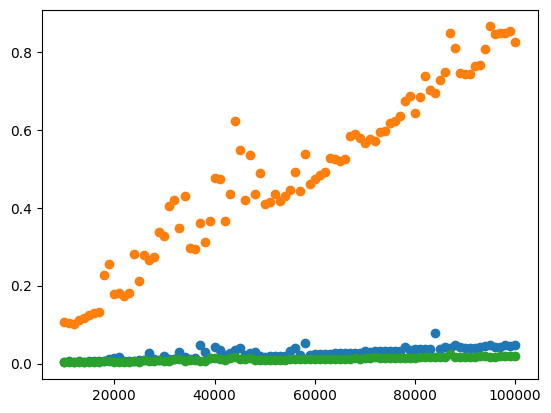

In [34]:
# Lets plot corresponding graphs for each algorithm. Decomp.
# Orange - LZ77.
# Green - Huffman.
# Blue - LZW.

def get_random_string(length):
    characters = string.ascii_letters + string.digits + string.punctuation
    result_str = ''.join(random.choice(characters) for i in range(length))
    return result_str

def comparer(start, end, step) -> None:
    lzw_compressor = LZWcompression(255)
    lz77_compressor = LZ77Compressor(100)
    lz77_time = []
    lzw_time = []
    haffman_time = []
    x_axis = range(start, end + 1, step)
    for length in x_axis:
        line = get_random_string(length)
        haffman_obj = Huffman(line)
        time_taken_lzw = timeit.timeit(lambda: lzw_compressor.compress(line), number=1)
        time_taken_lz77 = timeit.timeit(lambda: lz77_compressor.compressor(line), number=1)
        time_taken_huffman = timeit.timeit(lambda: haffman_obj.huffman_enc(), number=1)
        lz77_time.append(time_taken_lz77)
        lzw_time.append(time_taken_lzw)
        haffman_time.append(time_taken_huffman)
    plt.scatter(x_axis, lzw_time)
    plt.scatter(x_axis, lz77_time)
    plt.scatter(x_axis, haffman_time)

comparer(10000, 100000, 1000)

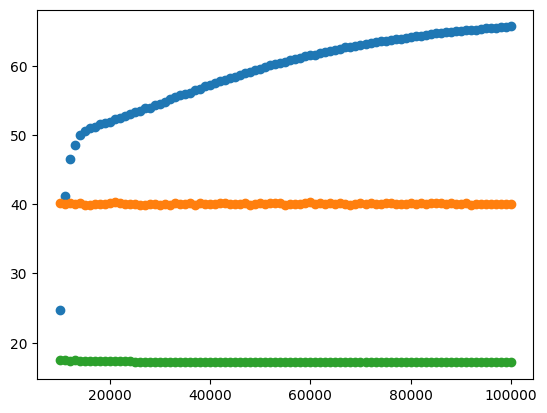

In [35]:
def get_random_string(length):
    characters = string.ascii_letters + string.digits + string.punctuation
    result_str = ''.join(random.choice(characters) for i in range(length))
    return result_str

def zip_comperer(start, end, step) -> None:
    lzw_compressor = LZWcompression(255)
    lz77_compressor = LZ77Compressor(100)
    lz77_zip = []
    lzw_zip = []
    haffman_zip = []
    x_axis = range(start, end + 1, step)
    for length in x_axis:
        line = get_random_string(length)
        haffman_obj = Huffman(line)
        lzw_mess = lzw_compressor.compress(line)
        lz77_mess = lz77_compressor.compressor(line)
        huffman = Huffman(line)
        encoded_mess, _ = huffman.huffman_enc()
        lzw_zip.append(round((1-(len(lzw_mess)/length))*100, 2))
        lz77_zip.append(round((1-(len(lz77_mess)/length))*100, 2))
        haffman_zip.append(round((1-((len(encoded_mess)//8)/length))*100, 2))
    plt.scatter(x_axis, lzw_zip)
    plt.scatter(x_axis, lz77_zip)
    plt.scatter(x_axis, haffman_zip)
    
zip_comperer(10000, 100000, 1000)